# Heart Disease Prediction using Logistic Regression

We will be using the famous Kaggle dataset "Framingham Heart Study (FHS)" for this study. This study intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression.

### Importing necessary Libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#loading dataset
df=pd.read_csv(r"/content/framingham_heart_disease.csv")

#Display the first few rows
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [7]:
#Display the columns
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [8]:
df.shape

(4238, 16)

## Data Cleaning and Transformation

### Handling missing values

In [9]:
# Check for missing values
df.isnull().sum()

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [10]:
#Since education having more missing values & it contributes less, lets drop the column
df=df.drop(['education'], axis=1)
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [11]:
round(df["cigsPerDay"].mean())

9

In [12]:
#Lets find out the mean values for replacing with missing values
cigsPerDay_mean = round(df["cigsPerDay"].mean())
BPMeds_mean = round(df["BPMeds"].mean())
totChol_mean = round(df["totChol"].mean())
BMI_mean = round(df["BMI"].mean())
heartRate_mean = round(df["heartRate"].mean())
glucose_mean = round(df["glucose"].mean())

In [13]:
#Replace the missing values with mean values
df['cigsPerDay'].fillna(cigsPerDay_mean, inplace = True)
df['BPMeds'].fillna(BPMeds_mean, inplace = True)
df['totChol'].fillna(totChol_mean, inplace = True)
df['BMI'].fillna(BMI_mean, inplace = True)
df['heartRate'].fillna(heartRate_mean, inplace = True)
df['glucose'].fillna(glucose_mean, inplace = True)

/tmp/ipython-input-360372923.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cigsPerDay'].fillna(cigsPerDay_mean, inplace = True)
/tmp/ipython-input-360372923.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [14]:
#Checking for missing values
df.isnull().sum()

,0
male,0
age,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0
sysBP,0


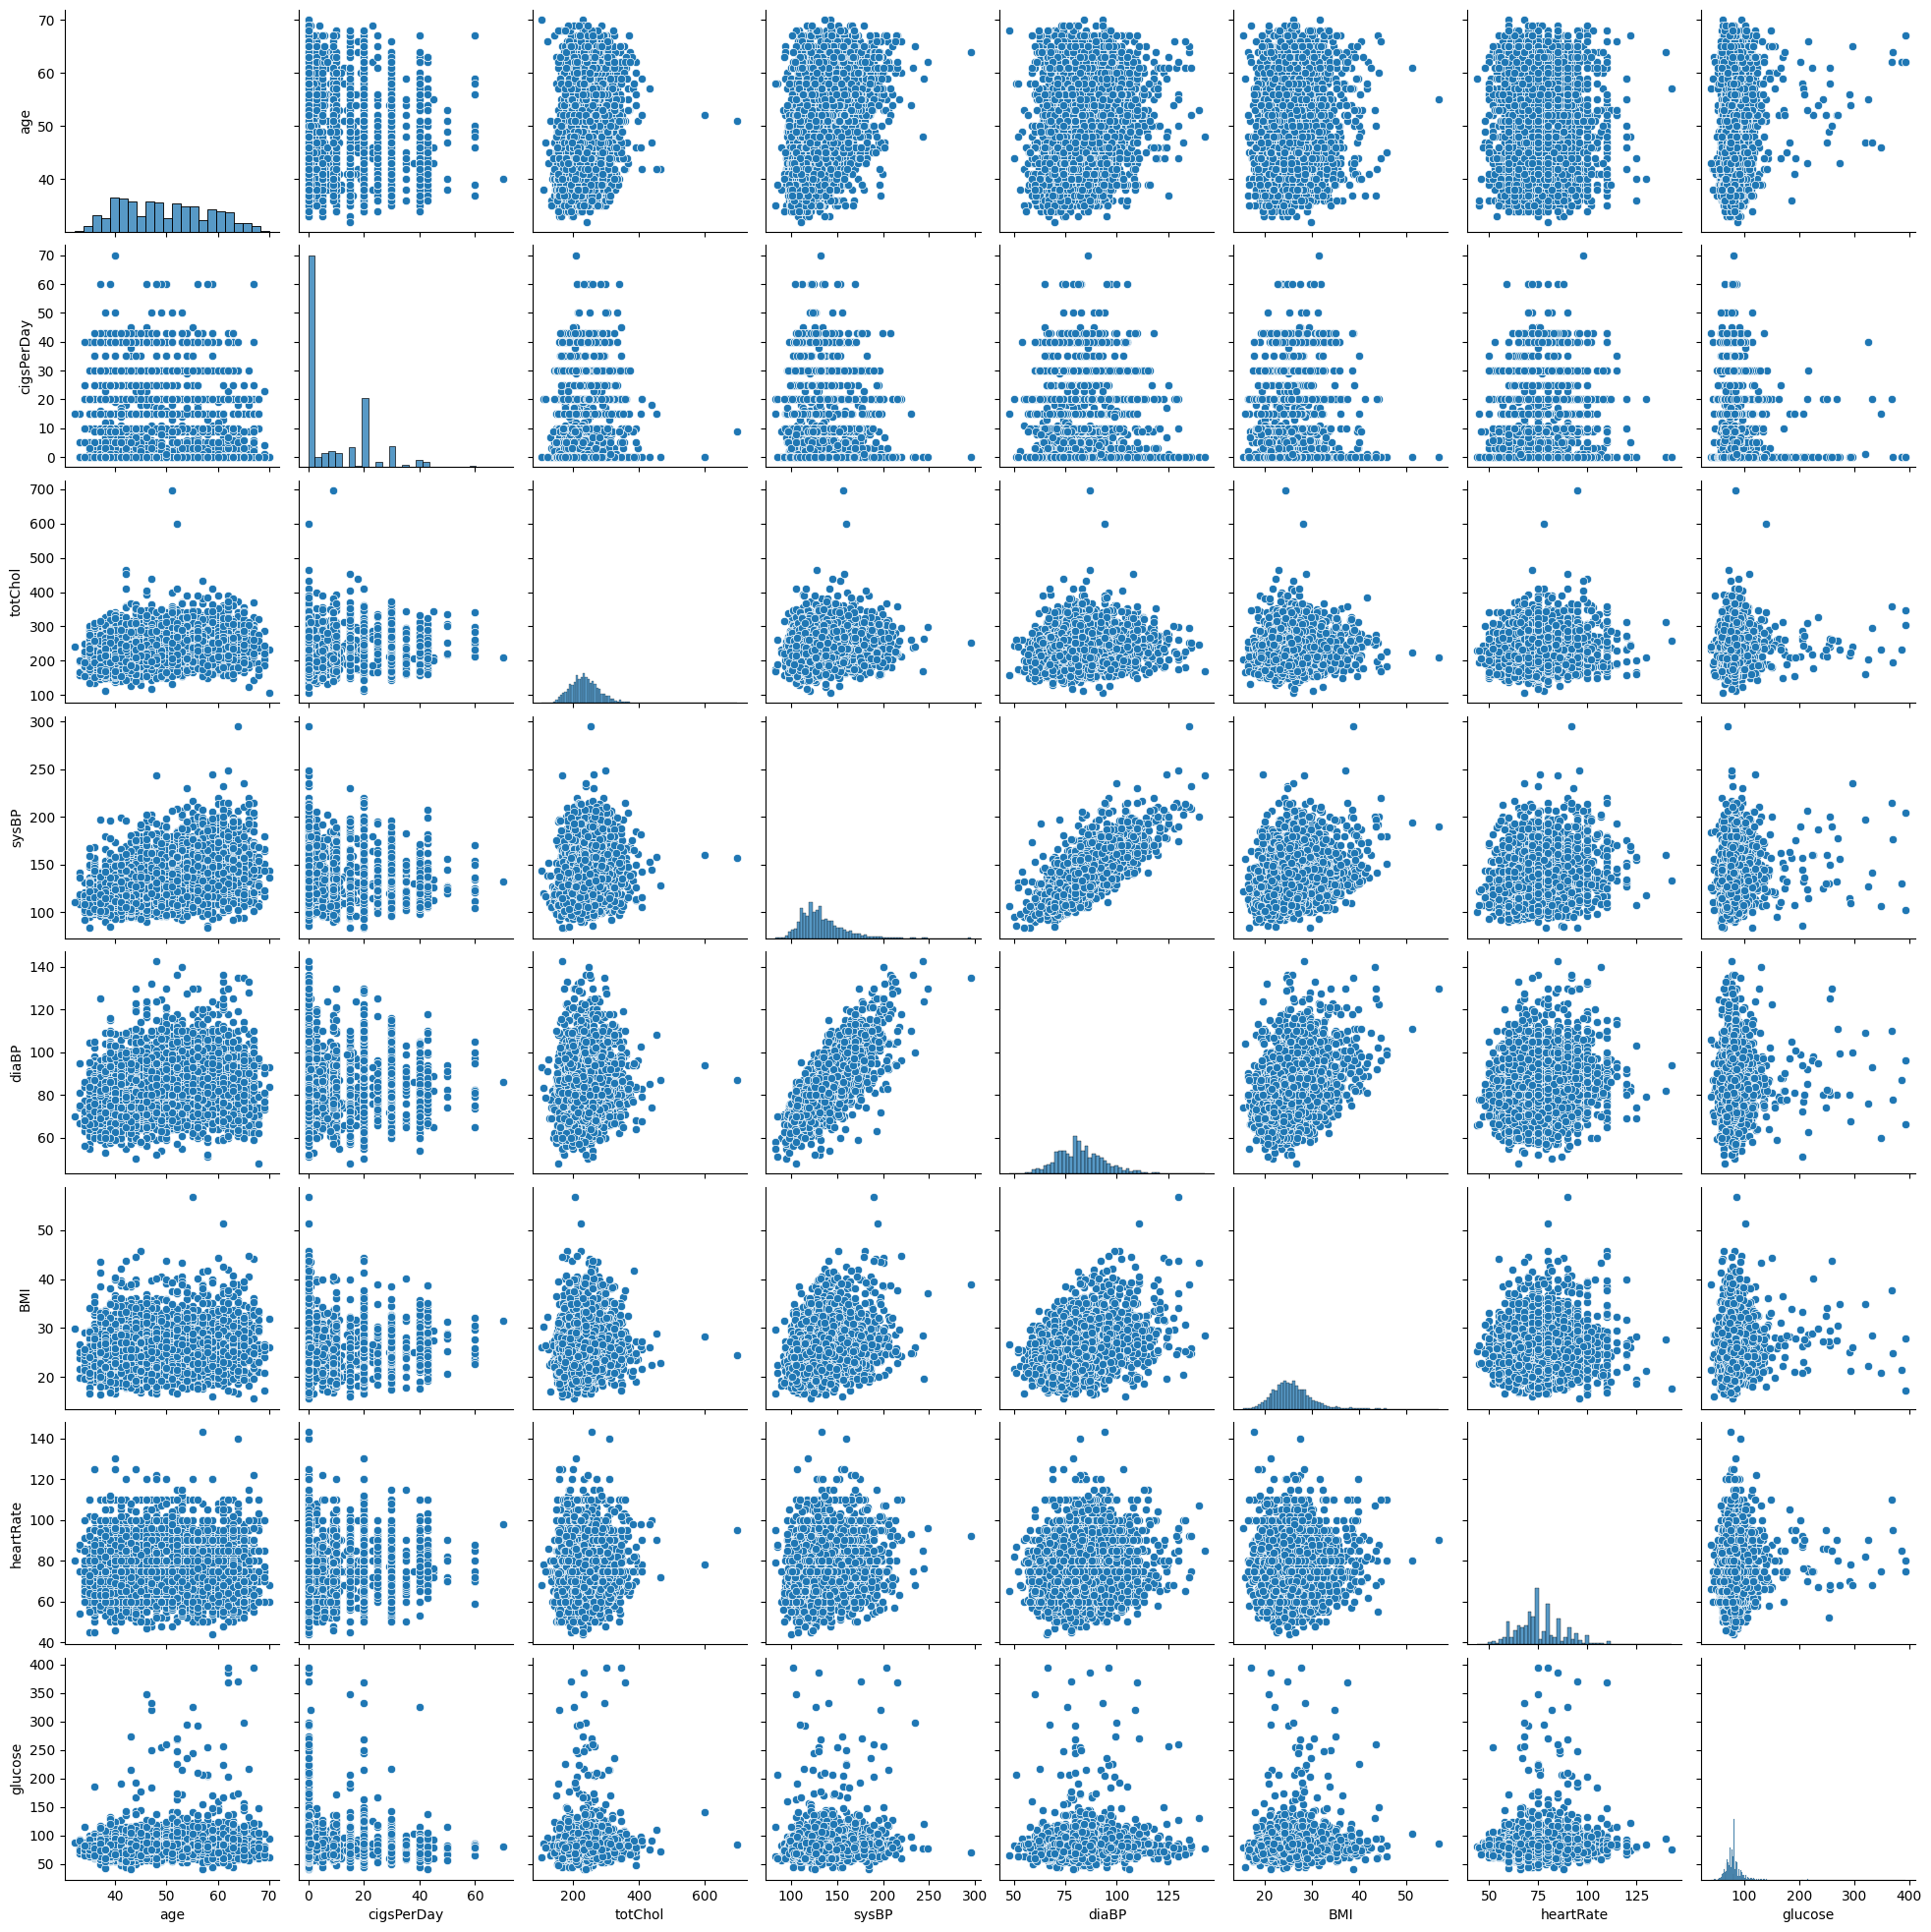

In [15]:
#Creating a pair wise plot for each columns
sns.pairplot(df[["age","cigsPerDay","totChol", "sysBP","diaBP", "BMI", "heartRate", "glucose"]])

### Splitting the dataset

In [16]:
# Splitting the DataFrame into predictor variables and target variable

X = df.drop('TenYearCHD',axis=1)

# Load the target variable to y

y=df['TenYearCHD']

In [17]:
# Train/Test splitting of data

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

print(X.shape, X_train.shape, X_test.shape)

(4238, 14) (3178, 14) (1060, 14)


### Model creation

In [18]:
from sklearn.linear_model import LogisticRegression
Classifier = LogisticRegression()

# Train the Logistic Regression Model

Classifier.fit(X_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Model Evaluation

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
# accuracy on training data
X_train_prediction = Classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8483322844556325


In [21]:
# accuracy on test data
X_test_prediction = Classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8603773584905661


In [22]:
#Lets print the classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       908
           1       0.61      0.07      0.13       152

    accuracy                           0.86      1060
   macro avg       0.74      0.53      0.53      1060
weighted avg       0.83      0.86      0.81      1060



In [23]:
#Confusion matrix
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,X_test_prediction)

print(cm)

[[901   7]
 [141  11]]
